## Neural Network Binary Classification using Keras

Keras is used in neural networks (NN) because it makes building and training deep learning models simple, fast, and user‑friendly, while still being powerful enough for research and production.

- High‑level API
- You can define a model in just a few lines
- Keras used to support multiple backends; now it’s tightly integrated with TensorFlow (tf.keras)

### Comparison Keras and Pytorch:

| Feature                | Keras (TensorFlow)                         | PyTorch                                   |
|------------------------|---------------------------------------------|--------------------------------------------|
| Ease of Use            | Very easy, high‑level API                   | Moderate, more code needed                 |
| Flexibility            | Good but less flexible than PyTorch         | Very high, research‑friendly               |
| Learning Curve         | Beginner‑friendly                           | Steeper but intuitive for Python users     |
| Computation Graph      | Static + Dynamic (TF 2.x eager mode)        | Fully dynamic                              |
| Customization          | Moderate                                    | Excellent (ideal for custom models)        |
| Research Adoption      | High                                        | Very high (dominates research)             |
| Industry Deployment    | Excellent (TF Serving, TF Lite, TF.js)      | Good (TorchServe, PyTorch Mobile)          |
| TPU Support            | Excellent                                   | Limited                                    |
| GPU Performance        | Strong                                      | Strong                                     |
| Model Prototyping      | Fast and simple                             | Fast for experts                            |
| Community              | Large, production-focused                   | Large, research-focused                    |
| Best For               | Production, beginners, fast prototyping     | Research, custom architectures, control    |


In [ ]:
import sys
print(sys.version)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Adam Optimizer
Adam stands for **Adaptive Moment Estimation**.  
It is one of the most widely used optimizers in neural networks, especially for **binary classification** (e.g., spam/ham, churn/no-churn, fraud/not-fraud, etc.).

Adam combines the strengths of:

*   **Momentum** → smooths gradients
*   **RMSProp** → adapts learning rate per parameter

This makes training **fast**, **stable**, and **less sensitive** to noisy gradients.

***

### **Why Adam is good for binary classification**

Binary classification uses the **binary cross-entropy loss**, which often produces noisy gradients, especially with:

*   small datasets
*   imbalanced classes
*   sigmoid output layer

Adam stabilizes this by controlling gradient updates intelligently.

***

## **How Adam Works (Step-by-Step) **

Adam keeps **two running averages** at every training step.

***

### **1️. Compute Gradient**

From your loss function, the network computes the gradient of error with respect to weights:

$$
g_t = \nabla_\theta L_t
$$

This gradient tells the optimizer how to adjust weights.

***

### **2️. First Moment (mₜ) — Momentum**

Adam calculates an **exponentially smoothed average** of the gradient:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$$

Think of it as:

> “Where is the gradient generally pointing?”

This filters out noise and stabilizes updates.

Typically:  
**β₁ = 0.9**

***

### **3️. Second Moment (vₜ) — RMSProp Component**

Adam also tracks the **average squared gradient**:

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

This tells:

> “How large is the gradient typically?”

Used to adjust learning rate per parameter.

Usually:  
**β₂ = 0.999**

***

### **4️. Bias Correction**

At the beginning of training, both averages are very small.  
So Adam corrects their bias:

$$
\hat m_t = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat v_t = \frac{v_t}{1 - \beta_2^t}
$$

This prevents extremely tiny updates early on.

***

### **5️. Weight Update Rule**

Finally, Adam updates the weights using:

$$
\theta_{t+1} = \theta_t - \alpha \cdot \frac{\hat m_t}{\sqrt{\hat v_t} + \epsilon}
$$

Where:

*   **α** = learning rate (default 0.001)
*   **ε** = a tiny value to avoid division by zero

***

### **Visualization: Adam’s Moment Estimates**

The plot below shows:

*   Raw gradients (noisy)
*   First moment (smooth trend)
*   Second moment (smooth squared magnitude)


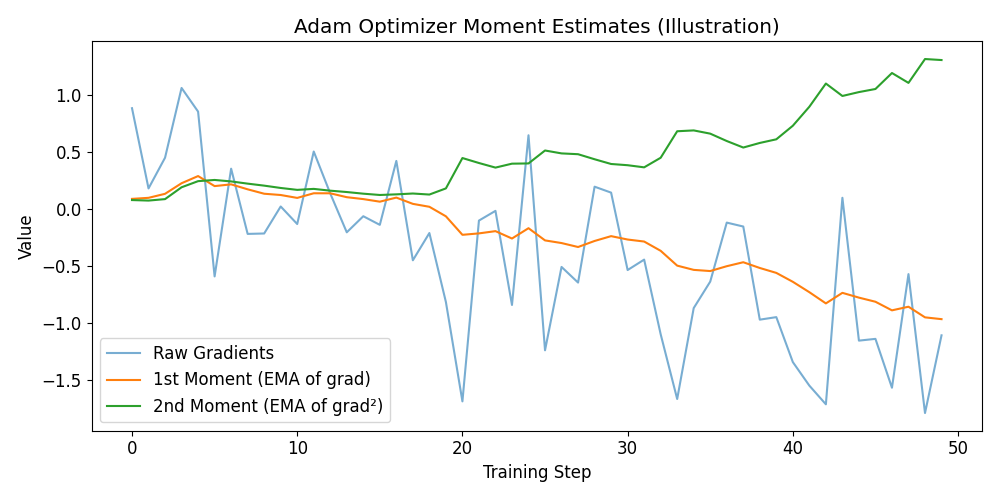


In [3]:

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

### Model Parameters Summary (Keras) explanation:


| Metric                       | Value         | Explanation                                              |
| ---------------------------- | ------------- | -------------------------------------------------------- |
| **Total Parameters**         | 321 (1.25 KB) | Total number of weights and biases in the neural network |
| **Trainable Parameters**     | 321 (1.25 KB) | Parameters updated during training via backpropagation   |
| **Non-Trainable Parameters** | 0 (0.00 B)    | Parameters frozen during training (none in this model)   |

#### Layer-wise Parameter Breakdown:
| Layer            | Input Units | Output Units | Weights Calculation | Biases | Total Params |
| ---------------- | ----------- | ------------ | ------------------- | ------ | ------------ |
| Dense (Hidden 1) | 10          | 16           | 10 × 16 = 160       | 16     | **176**      |
| Dense (Hidden 2) | 16          | 8            | 16 × 8 = 128        | 8      | **136**      |
| Dense (Output)   | 8           | 1            | 8 × 1 = 8           | 1      | **9**        |
| **Total**        | –           | –            | –                   | –      | **321**      |

### Memory Footprint Calculation:
| Item         | Value                                |
| ------------ | ------------------------------------ |
| Parameters   | 321                                  |
| Data type    | float32 (4 bytes)                    |
| Total Memory | 321 × 4 = **1,284 bytes (~1.25 KB)** |


In [4]:

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5016 - loss: 0.8376 - val_accuracy: 0.4500 - val_loss: 0.7931
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5328 - loss: 0.7379 - val_accuracy: 0.4812 - val_loss: 0.7133
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5813 - loss: 0.6619 - val_accuracy: 0.5500 - val_loss: 0.6553
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6359 - loss: 0.6051 - val_accuracy: 0.5938 - val_loss: 0.6135
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6781 - loss: 0.5597 - val_accuracy: 0.6375 - val_loss: 0.5796
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7469 - loss: 0.5213 - val_accuracy: 0.6938 - val_loss: 0.5508
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7812 - loss: 0.4885 - val_accuracy: 0.7250 - val_loss: 0.5267
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8250 - loss: 0.4587 - val_accuracy: 0.8062 - val_los


### Training Configuration Parameters (Keras)
### Model Training Settings

| Parameter            | Value | Definition                                                                                 | Impact                                                                                                             |
| -------------------- | ----- | ------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------ |
| **Epochs**           | 20    | One epoch represents a full pass of the entire training dataset through the neural network | Too few → underfitting; too many → overfitting and longer training time                                            |
| **Batch Size**       | 32    | Number of samples processed before the model updates its weights                           | Smaller batches improve generalization but slow training; larger batches speed up training but require more memory |
| **Validation Split** | 0.2   | Percentage of training data held out for validation during training                        | Helps detect overfitting and tune hyperparameters without touching test data                                       |
| **Verbose**          | 1     | Controls the level of logging output shown during training                                 | Improves training visibility and debugging; no impact on model performance                                         |


### To note
| Parameter        | Recommended Starting Point | When to Change                                  |
| ---------------- | -------------------------- | ----------------------------------------------- |
| Epochs           | 10–20                      | Increase if validation loss is still decreasing |
| Batch Size       | 32                         | Increase if training is slow and memory allows  |
| Validation Split | 0.2                        | Increase for small datasets                     |
| Verbose          | 1                          | Use 0 for production runs                       |


In [5]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7900 - loss: 0.3841  
Test Accuracy: 0.79


In [6]:

predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

predicted_classes[:10]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1]])